In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF 
from statsmodels.stats.anova import anova_lm

import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('df_clean.csv')[['Model', 'Price', 'Year', 'Miles', 'Transmission', 'EngineSize']]
df = df.drop_duplicates()
df

,Model,Price,Year,Miles,Transmission,EngineSize
0,3 Series,27871,2021,23071,Semiauto,2.0
4,3 Series,1795,2007,126000,Manual,2.0
6,X1,1800,2007,135000,Manual,1.5
7,3 Series,1895,2005,100000,Manual,2.0
9,3 Series,1995,2007,160000,Manual,2.0
...,...,...,...,...,...,...
19934,X3,19000,2016,40818,Automatic,2.0
19935,5 Series,14600,2016,42947,Automatic,2.0
19936,3 Series,13100,2017,25468,Manual,2.0
19937,1 Series,9930,2014,45000,Automatic,2.0


In [3]:
X = pd.DataFrame({'intercept': np.ones(df.shape[0]), 'miles': df['Miles']})
X[:4]

,intercept,miles
0,1.0,23071
4,1.0,126000
6,1.0,135000
7,1.0,100000


In [4]:
y = df['Price']
model = sm.OLS(y, X) 
results = model.fit()

In [5]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                 1.068e+04
Date:                Mon, 08 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:57:20   Log-Likelihood:            -2.0544e+05
No. Observations:               19449   AIC:                         4.109e+05
Df Residuals:                   19447   BIC:                         4.109e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.918e+04    105.258    277.204      0.000     2.9e+04    2.94e+04
miles         -0.2148      0.002   -103.343      0.000      -0.219      -0.211
==============================================================================
Omnibus:                     9958.376   Durbin-Watson:                   1.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            96000.369
Skew:                           2.268   Prob(JB):                         0.00
Kurtosis:                      12.894   Cond. No.                     7.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

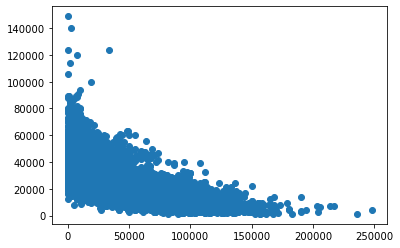

In [11]:
plt.scatter(df['Miles'], df['Price'])

In [13]:
df_numerical = df[['Price', 'Year', 'Miles', 'EngineSize']]
df_numerical 

,Price,Year,Miles,EngineSize
0,27871,2021,23071,2.0
4,1795,2007,126000,2.0
6,1800,2007,135000,1.5
7,1895,2005,100000,2.0
9,1995,2007,160000,2.0
...,...,...,...,...
19934,19000,2016,40818,2.0
19935,14600,2016,42947,2.0
19936,13100,2017,25468,2.0
19937,9930,2014,45000,2.0


In [14]:
numerical_list = ['Year', 'Miles', 'EngineSize']

In [17]:
results = []
for i in numerical_list:
    y = df['Price']
    model = sm.OLS(y, df[i]) 
    res = model.fit()
    results.append(res.summary())

In [18]:
results

[<class 'statsmodels.iolib.summary.Summary'>
 """
                                  OLS Regression Results                                
 Dep. Variable:                  Price   R-squared (uncentered):                   0.762
 Model:                            OLS   Adj. R-squared (uncentered):              0.762
 Method:                 Least Squares   F-statistic:                          6.228e+04
 Date:                Mon, 08 Apr 2024   Prob (F-statistic):                        0.00
 Time:                        19:36:25   Log-Likelihood:                     -2.0966e+05
 No. Observations:               19449   AIC:                                  4.193e+05
 Df Residuals:                   19448   BIC:                                  4.193e+05
 Df Model:                           1                                                  
 Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|     

In [19]:
df_numerical.corr()

,Price,Year,Miles,EngineSize
Price,1.000000,0.613421,-0.595395,0.225624
Year,0.613421,1.000000,-0.628843,-0.028311
Miles,-0.595395,-0.628843,1.000000,0.021212
EngineSize,0.225624,-0.028311,0.021212,1.000000
